In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



%matplotlib inline

data = pd.read_csv('data/kc_house_data.csv')

In [355]:
data.shape

(21597, 21)

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [357]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [358]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [359]:
#fill NaN values waterfront columns with 0
#for waterfront, 0 means no waterfront view
values = {'waterfront':0}
data.fillna(value=values, inplace=True)

In [360]:
#drop columns deemed superfluous
data.drop(columns = ['id','date','view','lat','long', 'sqft_living15', 'sqft_lot15', 'yr_built'], inplace=True)

In [361]:
#eliminate properties valued at $200000 or less and luxury homes from data set, 
#luxury homes defined as $500,000 and over 
#dropped 10041 rows
data = data[(data.price < 500000) & (data.price > 200000)]

#eliminate properties with 6 or more bedrooms and 4 or more bathrooms which were outliers in the data
#dropped 110 rows
data = data[(data.bedrooms < 6) & (data.bathrooms < 4)]

#eliminate properties with less than a full bathroom (defined as shower, bathtub, toilet, & sink) as judged
#to be undesirable. 
#dropped 48 rows
data = data[(data.bathrooms >= 1)]

In [362]:
data.shape

(11398, 13)

In [363]:
data.sqft_lot.describe()

count     11398.000000
mean      11948.404720
std       27441.463041
min         572.000000
25%        5057.000000
50%        7500.000000
75%        9760.000000
max      542322.000000
Name: sqft_lot, dtype: float64

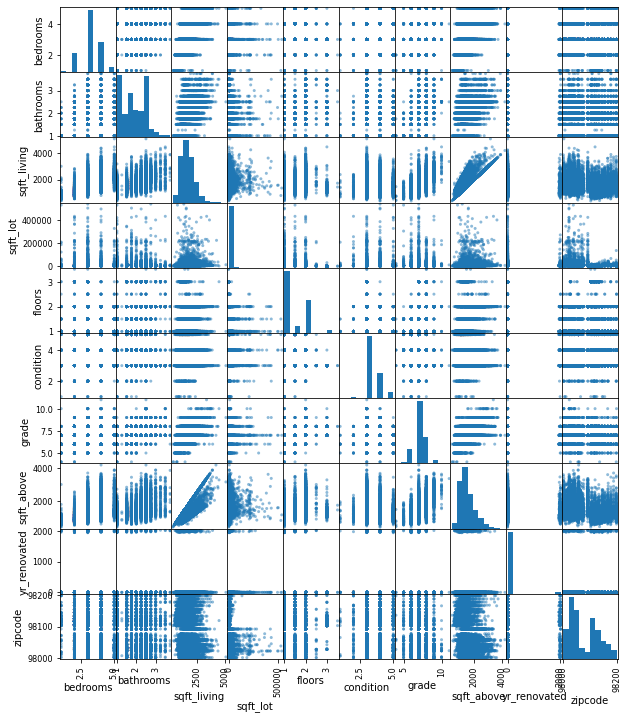

In [364]:
#scatter matrix for data, took out price (target), left out sqft_basement, yr_renovated, and waterfront
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade','sqft_above', 
          'yr_renovated', 'zipcode']
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [365]:
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.801744


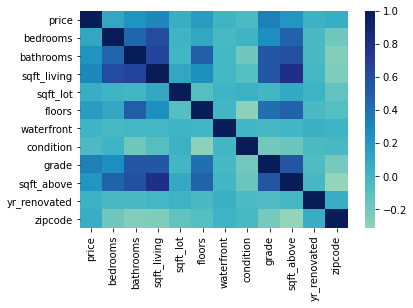

In [366]:
import seaborn as sns
sns.heatmap(data_pred.corr(), cmap="YlGnBu", center=0);

In [367]:
#change the value ? to string 0
data['sqft_basement'] = data['sqft_basement'].replace(['?'],'0')

#convert datatype of sqft_basement column to float
data = data.astype({'sqft_basement': float})

## First regression model - statsmodels only
### No changes were made to any features

In [368]:
#statsmodels regression model with unchanged predictors from scatter matrix 
outcome1 = 'price'
x_cols1 = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 
          'sqft_basement','sqft_above', 'yr_renovated', 'zipcode']
predictors1 = '+'.join(x_cols1)
formula1 = outcome1 + '~' + predictors1
model = ols(formula=formula1, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     150.7
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:45   Log-Likelihood:            -1.1800e+05
No. Observations:                9343   AIC:                         2.360e+05
Df Residuals:                    9330   BIC:                         2.361e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.011e+07   1.49e+06    -13.468      0.000    -2.3e+07   -1.72e+07
bedrooms      -9136.1744   1270.412     -7.192      0.000   -1.16e+04   -6645.890
bathrooms      -826.6534   1890.575     -0.437      0.662   -4532.594    2879.287
sqft_living      50.6567     14.765      3.431      0.001      21.715      79.598
sqft_lot          0.1774      0.027      6.467      0.000       0.124       0.231
floors         1.357e+04   2007.943      6.760      0.000    9637.686    1.75e+04
waterfront     3.984e+04    2.8e+04      1.423      0.155   -1.51e+04    9.47e+04
condition      4821.5183   1292.128      3.731      0.000    2288.666    7354.371
grade          2.717e+04   1334.258     20.363      0.000    2.46e+04    2.98e+04
sqft_basement    -2.4638     14.725     -0.167      0.867     -31.328      26.400
sqft_above      -25.1007     14.734     -1.704      0.088     -53.982       3.781
yr_renovated      8.2185      2.407      3.415      0.001       3.501      12.936
zipcode         206.0475     15.208     13.549      0.000     176.236     235.859
==============================================================================
Omnibus:                     1101.587   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.367
Skew:                           0.201   Prob(JB):                     1.37e-76
Kurtosis:                       2.143   Cond. No.                     1.93e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
#create binary categorical columns for sqft_basement and yr_renovated 

#create boolean column for whether a property has a basement
data['has_base'] = np.where((data['sqft_basement'] > 0),1,0)
data.head()

#fill NaN values in yr_renovated column with 0
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'].unique()

#create boolean column for whether a property has been renovated
data['has_renov'] = np.where((data['yr_renovated'] > 0),1,0)

#drop those orginal features
data.drop(columns = ['sqft_basement', 'yr_renovated'], inplace=True)

In [370]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,has_base,has_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,98178,0,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,98003,0,0
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,98198,0,0
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,98146,1,0
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,98038,0,0


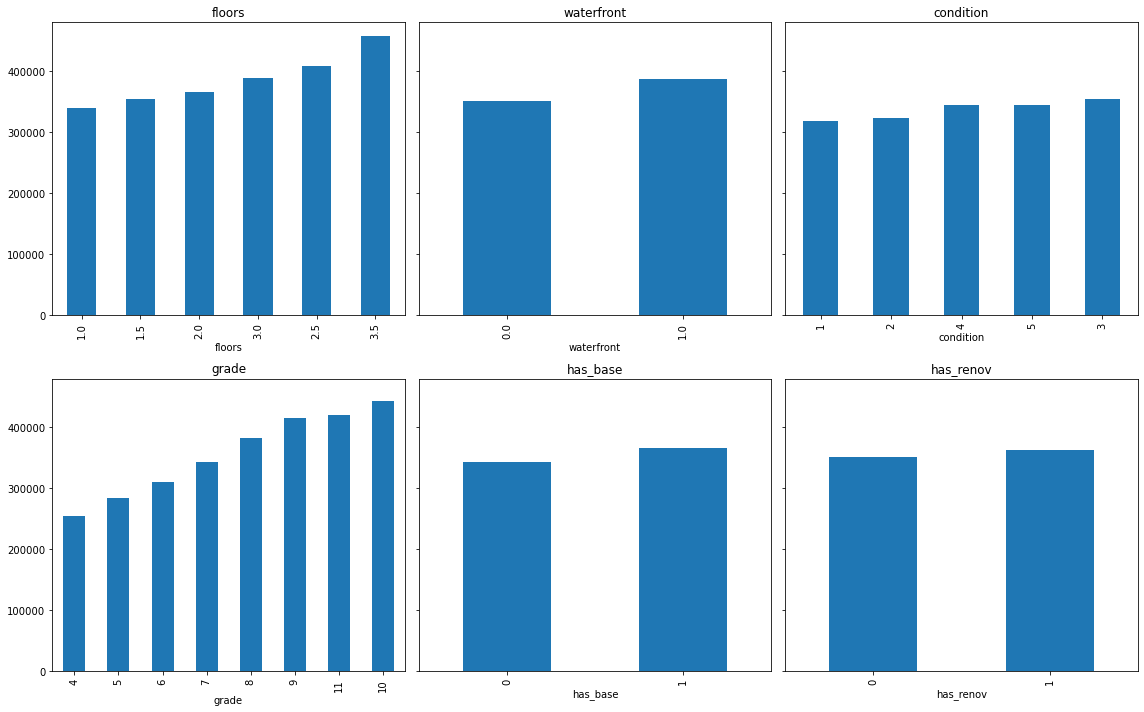

In [371]:
#create bar plots of categoricals
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
categoricals = ['floors', 'waterfront', 'condition', 'grade', 'has_base', 'has_renov']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();


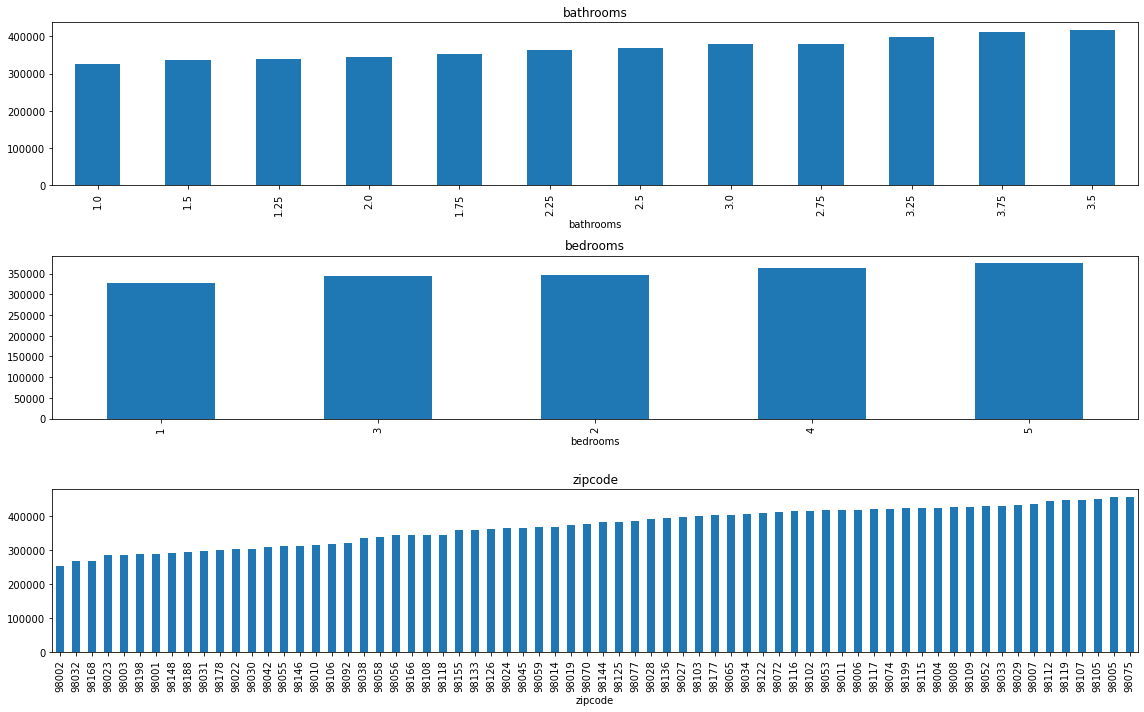

In [372]:
#create bar plots of categoricals
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,10))
categoricals = ['bathrooms', 'bedrooms','zipcode']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();


In [373]:
#change values in floors columns to prepare for one hot encoding
def floor(value):
    if value == 1:
        return 1
    elif value == 1.5:
        return '1and_half'
    elif value == 2:
        return 2
    elif value == 2.5:
        return '2and_half'
    elif value == 3:
        return 3
    elif value == 3.5:
        return '3and_half'
       
data.floors = data.floors.apply(floor)

#dealing with the bathrooms predictor
#change values in bathrooms column to prepare for one hot encoding
def baths(value):
    if value == 1:
        return 1
    elif value < 2:
        return '1and_quart_plus'
    elif value == 2:
        return 2
    elif value < 3:
        return '2and_quart_plus'
    elif value == 3:
        return 3
    elif value > 3:
        return '3and_quart_plus'
data.bathrooms = data.bathrooms.apply(baths)

In [374]:
#convert datatype of columns bedrooms, bathrooms, floors, condition, zipcode, and grade to prepare for 
#one hot encoding
convert_dict = {'bedrooms': str, 'bathrooms': str, 'floors': str, 'condition':str, 'zipcode': str, 
                'grade': str}
data = data.astype(convert_dict)

#create dummy variables for categoricals bedrooms, bathrooms, floors, condition, and grade
bedrooms_dum = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dum = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
floors_dum = pd.get_dummies(data['floors'], prefix='fl', drop_first=True)
condition_dum = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
zip_dum = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)
grade_dum = pd.get_dummies(data['grade'], prefix='gr', drop_first=True)

#remove orignial columns of dummy variables, add dummy columns
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'zipcode', 'grade'], axis=1)
data = pd.concat([data, bedrooms_dum, bathrooms_dum, floors_dum, condition_dum, zip_dum, grade_dum], axis=1)
data.head()

,price,sqft_living,sqft_lot,waterfront,sqft_above,has_base,has_renov,bed_2,bed_3,bed_4,...,zip_98188,zip_98198,zip_98199,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
0,221900.0,1180,5650,0.0,1180,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,1715,6819,0.0,1715,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,291850.0,1060,9711,0.0,1060,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8,229500.0,1780,7470,0.0,1050,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,323000.0,1890,6560,0.0,1890,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [375]:
#recheck collinearity as have changed features
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(cond_3, cond_4)",0.841532
"(sqft_above, sqft_living)",0.801744


In [376]:
#dropping features: sqft_above for collinearity with sqft_living and cond_3 for collinearity with cond_4
data.drop(['sqft_above', 'cond_3'], axis=1, inplace=True)


In [377]:
data.shape

(11398, 97)

## Second regression model - statsmodels and sklearn
### Binary categoricals have their columns, categoricals have been dummied, dropped sqft_above and cond_3 for collinearity

In [378]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = data.price
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 9118 rows and 96 columns
y_train is a Series with 9118 values
The training mean squared error:  2248160217.021116
The test mean squared error:  2280512873.289269
The training RSME:  47414.767921198516
The test RSME:  47754.71571781439


In [379]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     185.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:51   Log-Likelihood:            -1.1111e+05
No. Observations:                9118   AIC:                         2.224e+05
Df Residuals:                    9022   BIC:                         2.231e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.276e+05   1.26e+04     18.011      0.000    2.03e+05    2.52e+05
sqft_living             61.4903      1.556     39.525      0.000      58.441      64.540
sqft_lot                 0.2871      0.020     14.375      0.000       0.248       0.326
waterfront            5.768e+04   2.01e+04      2.863      0.004    1.82e+04    9.72e+04
has_base             -5456.5389   1338.817     -4.076      0.000   -8080.924   -2832.154
has_renov             1.097e+04   3452.508      3.179      0.001    4206.454    1.77e+04
bed_2                 1447.8236   5280.389      0.274      0.784   -8902.938    1.18e+04
bed_3                 1677.7168   5299.576      0.317      0.752   -8710.654    1.21e+04
bed_4                 1972.2545   5458.756      0.361      0.718   -8728.147    1.27e+04
bed_5                -7678.0582   5959.015     -1.288      0.198   -1.94e+04    4002.964
bath_1and_quart_plus  3978.6780   1685.167      2.361      0.018     675.368    7281.988
bath_2                5493.9990   2088.237      2.631      0.009    1400.581    9587.416
bath_2and_quart_plus  1.749e+04   2174.924      8.040      0.000    1.32e+04    2.18e+04
bath_3                1.174e+04   4136.586      2.837      0.005    3628.105    1.98e+04
bath_3and_quart_plus   1.48e+04   4686.011      3.158      0.002    5614.923     2.4e+04
fl_1and_half           403.2679   2106.203      0.191      0.848   -3725.369    4531.905
fl_2                 -6419.2947   1704.515     -3.766      0.000   -9760.532   -3078.058
fl_2and_half         -9805.8571   9609.044     -1.020      0.308   -2.86e+04    9030.050
fl_3                 -3.825e+04   3805.529    -10.051      0.000   -4.57e+04   -3.08e+04
fl_3and_half          7.669e+04   4.78e+04      1.603      0.109   -1.71e+04     1.7e+05
cond_2               -8362.2230   5539.738     -1.509      0.131   -1.92e+04    2496.921
cond_4                9166.9242   1249.102      7.339      0.000    6718.402    1.16e+04
cond_5                2.112e+04   2186.958      9.657      0.000    1.68e+04    2.54e+04
zip_98002            -1.129e+04   5437.539     -2.076      0.038   -2.19e+04    -631.537
zip_98003             -717.6400   4778.939     -0.150      0.881   -1.01e+04    8650.166
zip_98004             1.802e+05   4.81e+04      3.746      0.000    8.59e+04    2.74e+05
zip_98005             1.888e+05   1.98e+04      9.556      0.000     1.5e+05    2.28e+05
zip_98006             1.602e+05   7386.614     21.686      0.000    1.46e+05    1.75e+05
zip_98007             1.819e+05   8140.920     22.340      0.000    1.66e+05    1.98e+05
zip_98008             1.746e+05   6314.436     27.644      0.000    1.62e+05    1.87e+05
zip_98010             4.355e+04   7565.142      5.757      0.000    2.87e+04    5.84e+04
zip_98011             1.365e+05   5751.634     23.726    

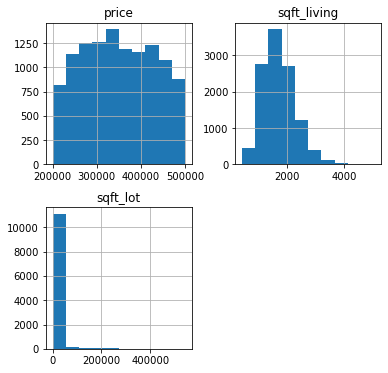

In [380]:
data[['price', 'sqft_living', 'sqft_lot']].hist(figsize=(6,6));

In [381]:
#eliminate outliers in sqft_lot
data = data[(data.sqft_lot > 1000) & (data.sqft_lot < 20000)]

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

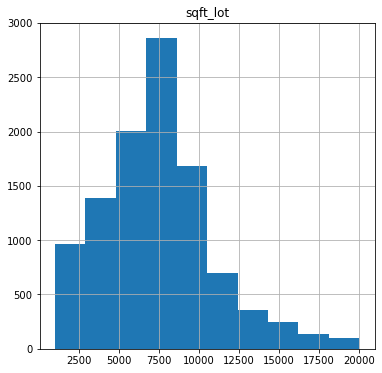

In [382]:
data[['sqft_lot']].hist(figsize=(6,6))

In [383]:
data.shape

(10440, 97)

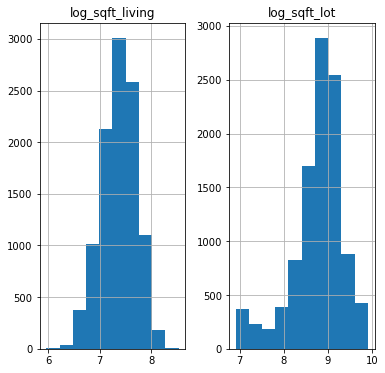

In [384]:
#log transform sqft_living and sqft_lot
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(data['sqft_living'])
data_log['log_sqft_lot'] = np.log(data['sqft_lot'])

data_log[['log_sqft_living', 'log_sqft_lot']].hist(figsize=(6,6));

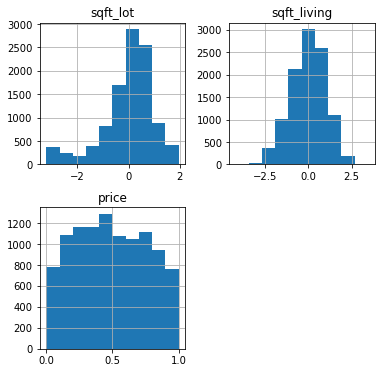

In [385]:
#scale price, sqft_lot and sqftliving_log
price = data['price']
sqft_lot = data_log['log_sqft_lot']
sqft_living = data_log['log_sqft_living']


scaled_price = (price - min(price)) / (max(price) - min(price))
scaled_sqftlot = (sqft_lot - np.mean(sqft_lot) )/ np.sqrt(np.var(sqft_lot))
scaled_sqftliving = (sqft_living - np.mean(sqft_living)) / np.sqrt(np.var(sqft_living))

#df with scaled features only
data_scaled = pd.DataFrame([])
data_scaled['sqft_lot'] = scaled_sqftlot
data_scaled['sqft_living'] = scaled_sqftliving
data_scaled['price'] = scaled_price

data_scaled.hist(figsize=(6,6));

In [386]:
#df to add log and scaled sqft_lot and sqft_living
scaled_df = data.copy()

#drop original price, sqft_lot and sqft_living
scaled_df.drop(['price', 'sqft_lot', 'sqft_living'], axis=1, inplace=True)

#concat log and scaled sqft_lot and sqft_living
scaled_df = pd.concat([scaled_df, data_scaled], axis=1)
scaled_df

,waterfront,has_base,has_renov,bed_2,bed_3,bed_4,bed_5,bath_1and_quart_plus,bath_2,bath_2and_quart_plus,...,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,sqft_lot,sqft_living,price
0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.225508,-0.892453,0.072613
6,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0.099343,0.218532,0.191333
7,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0.710062,-1.211118,0.305885
8,0.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.256852,0.329067,0.097958
9,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0.032454,0.507240,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,0.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,-3.011790,-0.199350,0.763259
21591,0.0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,-2.771565,-0.581909,0.916662
21592,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,-3.004137,-0.120634,0.533155
21593,0.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,-0.176379,1.103504,0.666549


## Third regression model - statsmodels & sklearn
### price min/max scaled, log transform & normalize sqft_living & sqft_lot

In [387]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = scaled_df.price
X = scaled_df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 96 columns
y_train is a Series with 8352 values
The training mean squared error:  0.022700375771022595
The test mean squared error:  0.025968964761069104
The training RSME:  0.15066643876797048
The test RSME:  0.16114889003982963


In [388]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     187.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:54   Log-Likelihood:                 3956.7
No. Observations:                8352   AIC:                            -7719.
Df Residuals:                    8255   BIC:                            -7038.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4984      0.040     12.427      0.000       0.420       0.577
waterfront               0.0527      0.093      0.570      0.569      -0.129       0.234
has_base                -0.0175      0.005     -3.692      0.000      -0.027      -0.008
has_renov                0.0401      0.012      3.330      0.001       0.017       0.064
bed_2                   -0.0233      0.018     -1.289      0.198      -0.059       0.012
bed_3                   -0.0467      0.018     -2.544      0.011      -0.083      -0.011
bed_4                   -0.0374      0.019     -1.970      0.049      -0.075      -0.000
bed_5                   -0.0532      0.021     -2.590      0.010      -0.093      -0.013
bath_1and_quart_plus     0.0062      0.006      1.075      0.283      -0.005       0.017
bath_2                   0.0131      0.007      1.861      0.063      -0.001       0.027
bath_2and_quart_plus     0.0577      0.007      7.702      0.000       0.043       0.072
bath_3                   0.0441      0.013      3.271      0.001       0.018       0.071
bath_3and_quart_plus     0.0721      0.015      4.749      0.000       0.042       0.102
fl_1and_half             0.0013      0.007      0.185      0.853      -0.013       0.016
fl_2                     0.0075      0.007      1.156      0.248      -0.005       0.020
fl_2and_half             0.0500      0.035      1.428      0.153      -0.019       0.119
fl_3                    -0.0655      0.015     -4.490      0.000      -0.094      -0.037
fl_3and_half             0.1597      0.108      1.477      0.140      -0.052       0.371
cond_2                  -0.0406      0.019     -2.116      0.034      -0.078      -0.003
cond_4                   0.0239      0.004      5.715      0.000       0.016       0.032
cond_5                   0.0647      0.007      9.042      0.000       0.051       0.079
zip_98002               -0.0132      0.018     -0.739      0.460      -0.048       0.022
zip_98003                0.0270      0.016      1.721      0.085      -0.004       0.058
zip_98004                0.6138      0.153      4.007      0.000       0.314       0.914
zip_98005                0.7098      0.069     10.319      0.000       0.575       0.845
zip_98006                0.5369      0.023     23.049      0.000       0.491       0.583
zip_98007                0.6104      0.028     21.846      0.000       0.556       0.665
zip_98008                0.6108      0.020     30.081      0.000       0.571       0.651
zip_98010                0.0939      0.031      3.050      0.002       0.034       0.154
zip_98011                0.4922      0.019     25.708      0.000       0.455       0.530
zip_98014                0.3164      0.028     11.185      0.000       0.261       0.372
zip_98019                0.3168      0.020     16.092    

## Fourth regression model - statsmodels and sklearn
### eliminate zipcodes with high p-values and confidence levels spanning 0

In [389]:
z_list = ['zip_98002', 'zip_98003', 'zip_98022', 'zip_98023', 'zip_98032', 'zip_98092']
dropped_z = scaled_df.copy()
dropped_z.drop(z_list, axis=1, inplace=True)

In [390]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = dropped_z.price
X = dropped_z.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 90 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023645066823268057
The test mean squared error:  0.0223813015869766
The training RSME:  0.15376952501477026
The test RSME:  0.14960381541583959


In [391]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     194.7
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:56   Log-Likelihood:                 3786.5
No. Observations:                8352   AIC:                            -7393.
Df Residuals:                    8262   BIC:                            -6760.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4548      0.038     11.965      0.000       0.380       0.529
waterfront               0.0515      0.094      0.550      0.582      -0.132       0.235
has_base                -0.0189      0.005     -3.943      0.000      -0.028      -0.009
has_renov                0.0356      0.012      3.042      0.002       0.013       0.059
bed_2                   -0.0128      0.018     -0.698      0.485      -0.049       0.023
bed_3                   -0.0349      0.019     -1.882      0.060      -0.071       0.001
bed_4                   -0.0248      0.019     -1.295      0.195      -0.062       0.013
bed_5                   -0.0499      0.021     -2.394      0.017      -0.091      -0.009
bath_1and_quart_plus     0.0066      0.006      1.123      0.262      -0.005       0.018
bath_2                   0.0078      0.007      1.087      0.277      -0.006       0.022
bath_2and_quart_plus     0.0515      0.008      6.741      0.000       0.036       0.066
bath_3                   0.0468      0.014      3.296      0.001       0.019       0.075
bath_3and_quart_plus     0.0764      0.016      4.777      0.000       0.045       0.108
fl_1and_half            -0.0007      0.007     -0.092      0.927      -0.015       0.014
fl_2                     0.0076      0.007      1.159      0.247      -0.005       0.021
fl_2and_half             0.0248      0.035      0.711      0.477      -0.044       0.093
fl_3                    -0.0670      0.015     -4.507      0.000      -0.096      -0.038
fl_3and_half             0.1441      0.110      1.307      0.191      -0.072       0.360
cond_2                  -0.0338      0.020     -1.677      0.094      -0.073       0.006
cond_4                   0.0271      0.004      6.343      0.000       0.019       0.035
cond_5                   0.0649      0.007      8.835      0.000       0.050       0.079
zip_98004                0.6089      0.156      3.903      0.000       0.303       0.915
zip_98005                0.7106      0.063     11.202      0.000       0.586       0.835
zip_98006                0.5358      0.022     24.309      0.000       0.493       0.579
zip_98007                0.5986      0.027     22.444      0.000       0.546       0.651
zip_98008                0.6171      0.019     31.918      0.000       0.579       0.655
zip_98010                0.0906      0.028      3.192      0.001       0.035       0.146
zip_98011                0.4840      0.017     28.219      0.000       0.450       0.518
zip_98014                0.2973      0.026     11.292      0.000       0.246       0.349
zip_98019                0.3293      0.017     19.323      0.000       0.296       0.363
zip_98024                0.3670      0.039      9.398      0.000       0.290       0.444
zip_98027                0.5264      0.022     23.996    

## Fifth regression model - statsmodels and sklearn
### eliminate gr_9 & gr_11 for continued & increased high p-values and confidence levels spanning 0 from 4th regression

In [392]:
drop_gr = dropped_z.copy()
drop_gr.drop(['gr_9', 'gr_11'], axis=1, inplace=True)

In [393]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = drop_gr.price
X = drop_gr.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 88 columns
y_train is a Series with 8352 values
The training mean squared error:  0.02344704970814825
The test mean squared error:  0.023210683099921497
The training RSME:  0.15312429496375893
The test RSME:  0.1523505270746429


In [394]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     200.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:57   Log-Likelihood:                 3821.6
No. Observations:                8352   AIC:                            -7465.
Df Residuals:                    8263   BIC:                            -6840.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3904      0.021     18.359      0.000       0.349       0.432
waterfront               0.1321      0.159      0.831      0.406      -0.179       0.444
has_base                -0.0180      0.005     -3.779      0.000      -0.027      -0.009
has_renov                0.0430      0.012      3.535      0.000       0.019       0.067
bed_2                   -0.0097      0.018     -0.540      0.589      -0.045       0.026
bed_3                   -0.0255      0.018     -1.402      0.161      -0.061       0.010
bed_4                   -0.0138      0.019     -0.729      0.466      -0.051       0.023
bed_5                   -0.0317      0.021     -1.540      0.124      -0.072       0.009
bath_1and_quart_plus     0.0058      0.006      1.001      0.317      -0.006       0.017
bath_2                   0.0053      0.007      0.745      0.457      -0.009       0.019
bath_2and_quart_plus     0.0542      0.008      7.211      0.000       0.039       0.069
bath_3                   0.0512      0.014      3.654      0.000       0.024       0.079
bath_3and_quart_plus     0.0700      0.015      4.517      0.000       0.040       0.100
fl_1and_half            -0.0079      0.007     -1.066      0.287      -0.022       0.007
fl_2                     0.0060      0.007      0.929      0.353      -0.007       0.019
fl_2and_half             0.0326      0.038      0.849      0.396      -0.043       0.108
fl_3                    -0.0763      0.015     -5.216      0.000      -0.105      -0.048
fl_3and_half            -0.0254      0.155     -0.163      0.870      -0.330       0.279
cond_2                  -0.0344      0.021     -1.675      0.094      -0.075       0.006
cond_4                   0.0265      0.004      6.279      0.000       0.018       0.035
cond_5                   0.0636      0.007      8.735      0.000       0.049       0.078
zip_98004                0.6081      0.155      3.912      0.000       0.303       0.913
zip_98005                0.6958      0.069     10.068      0.000       0.560       0.831
zip_98006                0.5529      0.021     26.513      0.000       0.512       0.594
zip_98007                0.6356      0.026     24.604      0.000       0.585       0.686
zip_98008                0.6245      0.018     34.352      0.000       0.589       0.660
zip_98010                0.0950      0.028      3.368      0.001       0.040       0.150
zip_98011                0.4749      0.017     28.515      0.000       0.442       0.508
zip_98014                0.2925      0.028     10.551      0.000       0.238       0.347
zip_98019                0.3158      0.017     18.980      0.000       0.283       0.348
zip_98024                0.3415      0.033     10.260      0.000       0.276       0.407
zip_98027                0.5252      0.022     23.750    

## Sixth regression model - statsmodels and sklearn
### eliminate bed_2, bath_1and_quart_plus, bath_2, cond_2 for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [395]:
more_drops = drop_gr.copy()
more_drops.drop(['bed_2', 'bath_1and_quart_plus', 'bath_2', 'cond_2'], axis=1, inplace=True)

In [396]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 84 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023432273689505123
The test mean squared error:  0.02337332565465983
The training RSME:  0.15307603891368865
The test RSME:  0.15288337272136507


In [397]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     208.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:59   Log-Likelihood:                 3824.2
No. Observations:                8352   AIC:                            -7478.
Df Residuals:                    8267   BIC:                            -6881.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3966      0.012     32.868      0.000       0.373       0.420
waterfront               0.3596      0.159      2.258      0.024       0.047       0.672
has_base                -0.0159      0.005     -3.350      0.001      -0.025      -0.007
has_renov                0.0258      0.012      2.163      0.031       0.002       0.049
bed_3                   -0.0215      0.006     -3.722      0.000      -0.033      -0.010
bed_4                   -0.0096      0.007     -1.330      0.183      -0.024       0.005
bed_5                   -0.0304      0.011     -2.833      0.005      -0.051      -0.009
bath_2and_quart_plus     0.0464      0.005      8.644      0.000       0.036       0.057
bath_3                   0.0390      0.013      3.080      0.002       0.014       0.064
bath_3and_quart_plus     0.0540      0.015      3.697      0.000       0.025       0.083
fl_1and_half            -0.0018      0.007     -0.243      0.808      -0.016       0.013
fl_2                     0.0125      0.007      1.902      0.057      -0.000       0.025
fl_2and_half             0.0285      0.037      0.764      0.445      -0.045       0.101
fl_3                    -0.0779      0.015     -5.271      0.000      -0.107      -0.049
fl_3and_half             0.1599      0.110      1.458      0.145      -0.055       0.375
cond_4                   0.0261      0.004      6.196      0.000       0.018       0.034
cond_5                   0.0655      0.007      8.993      0.000       0.051       0.080
zip_98004                0.5719      0.154      3.713      0.000       0.270       0.874
zip_98005                0.7084      0.077      9.184      0.000       0.557       0.860
zip_98006                0.5539      0.022     25.278      0.000       0.511       0.597
zip_98007                0.6175      0.025     24.547      0.000       0.568       0.667
zip_98008                0.6327      0.019     33.410      0.000       0.596       0.670
zip_98010                0.1170      0.027      4.342      0.000       0.064       0.170
zip_98011                0.4853      0.017     28.769      0.000       0.452       0.518
zip_98014                0.2950      0.026     11.268      0.000       0.244       0.346
zip_98019                0.3376      0.017     20.031      0.000       0.305       0.371
zip_98024                0.3310      0.039      8.525      0.000       0.255       0.407
zip_98027                0.5163      0.022     23.620      0.000       0.473       0.559
zip_98028                0.4020      0.014     28.515      0.000       0.374       0.430
zip_98029                0.5933      0.019     31.417      0.000       0.556       0.630
zip_98030                0.0428      0.012      3.504      0.000       0.019       0.067
zip_98031                0.0477      0.012      3.980    

In [398]:
more_drops

,waterfront,has_base,has_renov,bed_3,bed_4,bed_5,bath_2and_quart_plus,bath_3,bath_3and_quart_plus,fl_1and_half,...,zip_98198,zip_98199,gr_4,gr_5,gr_6,gr_7,gr_8,sqft_lot,sqft_living,price
0,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.225508,-0.892453,0.072613
6,0.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.099343,0.218532,0.191333
7,0.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.710062,-1.211118,0.305885
8,0.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.256852,0.329067,0.097958
9,0.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.032454,0.507240,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-3.011790,-0.199350,0.763259
21591,0.0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,-2.771565,-0.581909,0.916662
21592,0.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,-3.004137,-0.120634,0.533155
21593,0.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,-0.176379,1.103504,0.666549


## Seventh regression model - statsmodels and sklearn
### eliminate fl_1and_half, fl_2and_half, & waterfront for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [399]:
more_drops.drop(['waterfront','fl_1and_half', 'fl_2and_half'], axis=1, inplace=True)
more_drops

,has_base,has_renov,bed_3,bed_4,bed_5,bath_2and_quart_plus,bath_3,bath_3and_quart_plus,fl_2,fl_3,...,zip_98198,zip_98199,gr_4,gr_5,gr_6,gr_7,gr_8,sqft_lot,sqft_living,price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.225508,-0.892453,0.072613
6,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0.099343,0.218532,0.191333
7,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.710062,-1.211118,0.305885
8,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.256852,0.329067,0.097958
9,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0.032454,0.507240,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,-3.011790,-0.199350,0.763259
21591,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,-2.771565,-0.581909,0.916662
21592,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,-3.004137,-0.120634,0.533155
21593,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,-0.176379,1.103504,0.666549


In [400]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 81 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023241311290870165
The test mean squared error:  1.158637559380712e+22
The training RSME:  0.15245101275777137
The test RSME:  107640027841.90982


In [401]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     220.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:25   Log-Likelihood:                 3865.3
No. Observations:                8352   AIC:                            -7569.
Df Residuals:                    8271   BIC:                            -6999.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3852      0.012     31.930      0.000       0.362       0.409
has_base                -0.0179      0.005     -3.912      0.000      -0.027      -0.009
has_renov                0.0387      0.012      3.290      0.001       0.016       0.062
bed_3                   -0.0215      0.006     -3.816      0.000      -0.033      -0.010
bed_4                   -0.0082      0.007     -1.161      0.246      -0.022       0.006
bed_5                   -0.0346      0.011     -3.263      0.001      -0.055      -0.014
bath_2and_quart_plus     0.0414      0.005      7.746      0.000       0.031       0.052
bath_3                   0.0404      0.012      3.258      0.001       0.016       0.065
bath_3and_quart_plus     0.0593      0.014      4.152      0.000       0.031       0.087
fl_2                     0.0103      0.006      1.633      0.102      -0.002       0.023
fl_3                    -0.0808      0.015     -5.507      0.000      -0.110      -0.052
fl_3and_half             0.1616      0.109      1.481      0.139      -0.052       0.375
cond_4                   0.0232      0.004      5.549      0.000       0.015       0.031
cond_5                   0.0652      0.007      8.983      0.000       0.051       0.079
zip_98004             3.152e-15   8.88e-16      3.549      0.000    1.41e-15    4.89e-15
zip_98005                0.6948      0.077      9.054      0.000       0.544       0.845
zip_98006                0.5531      0.021     26.703      0.000       0.513       0.594
zip_98007                0.6295      0.026     24.197      0.000       0.578       0.680
zip_98008                0.6212      0.018     35.020      0.000       0.586       0.656
zip_98010                0.1243      0.030      4.152      0.000       0.066       0.183
zip_98011                0.4839      0.016     29.369      0.000       0.452       0.516
zip_98014                0.2993      0.028     10.515      0.000       0.244       0.355
zip_98019                0.3414      0.017     20.322      0.000       0.308       0.374
zip_98024                0.3607      0.039      9.323      0.000       0.285       0.436
zip_98027                0.5269      0.021     25.139      0.000       0.486       0.568
zip_98028                0.4057      0.014     28.799      0.000       0.378       0.433
zip_98029                0.5955      0.019     32.038      0.000       0.559       0.632
zip_98030                0.0486      0.012      3.909      0.000       0.024       0.073
zip_98031                0.0536      0.012      4.439      0.000       0.030       0.077
zip_98033                0.6101      0.019     32.231      0.000       0.573       0.647
zip_98034                0.5176      0.010     50.879      0.000       0.498       0.538
zip_98038                0.1499      0.009     16.054    

## Eighth regression model - statsmodels and sklearn
### eliminate bed_4, fl_2, & fl_3and_half for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [402]:
more_drops.drop(['bed_4','fl_2', 'fl_3and_half'], axis=1, inplace=True)

In [403]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 78 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023246571243339297
The test mean squared error:  0.024020676453514453
The training RSME:  0.15246826306920172
The test RSME:  0.1549860524483234


In [404]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     226.7
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:06:43   Log-Likelihood:                 3857.5
No. Observations:                8352   AIC:                            -7557.
Df Residuals:                    8273   BIC:                            -7002.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3934      0.011     36.037      0.000       0.372       0.415
has_base                -0.0193      0.004     -4.716      0.000      -0.027      -0.011
has_renov                0.0413      0.012      3.359      0.001       0.017       0.065
bed_3                   -0.0133      0.004     -3.682      0.000      -0.020      -0.006
bed_5                   -0.0278      0.009     -3.213      0.001      -0.045      -0.011
bath_2and_quart_plus     0.0483      0.005     10.005      0.000       0.039       0.058
bath_3                   0.0487      0.012      3.976      0.000       0.025       0.073
bath_3and_quart_plus     0.0774      0.014      5.383      0.000       0.049       0.106
fl_3                    -0.0801      0.013     -5.999      0.000      -0.106      -0.054
cond_4                   0.0276      0.004      6.621      0.000       0.019       0.036
cond_5                   0.0609      0.007      8.426      0.000       0.047       0.075
zip_98004                0.5752      0.153      3.751      0.000       0.275       0.876
zip_98005                0.7038      0.063     11.214      0.000       0.581       0.827
zip_98006                0.5486      0.022     25.142      0.000       0.506       0.591
zip_98007                0.6191      0.026     23.798      0.000       0.568       0.670
zip_98008                0.6039      0.019     32.257      0.000       0.567       0.641
zip_98010                0.0959      0.029      3.315      0.001       0.039       0.153
zip_98011                0.4933      0.017     29.482      0.000       0.460       0.526
zip_98014                0.3198      0.027     11.940      0.000       0.267       0.372
zip_98019                0.3335      0.017     19.471      0.000       0.300       0.367
zip_98024                0.3713      0.036     10.443      0.000       0.302       0.441
zip_98027                0.5367      0.021     25.355      0.000       0.495       0.578
zip_98028                0.4085      0.014     29.083      0.000       0.381       0.436
zip_98029                0.5975      0.018     32.494      0.000       0.561       0.634
zip_98030                0.0486      0.012      4.021      0.000       0.025       0.072
zip_98031                0.0566      0.012      4.671      0.000       0.033       0.080
zip_98033                0.6224      0.020     31.519      0.000       0.584       0.661
zip_98034                0.5168      0.010     50.843      0.000       0.497       0.537
zip_98038                0.1483      0.009     15.642      0.000       0.130       0.167
zip_98042                0.0592      0.010      6.055      0.000       0.040       0.078
zip_98045                0.3323      0.016     20.674      0.000       0.301       0.364
zip_98052                0.6035      0.016     38.588    

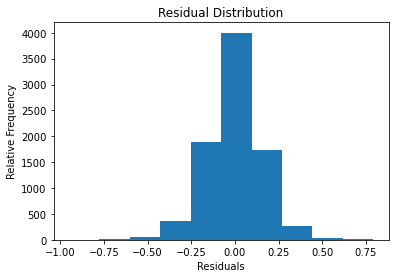

In [406]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

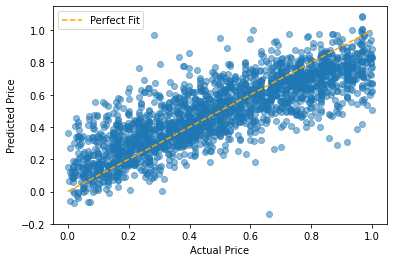

In [412]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = (y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

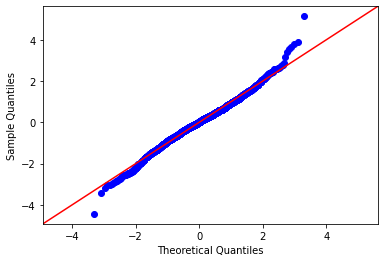

In [408]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);